In [20]:
# %%
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import os
import cvlib as cv
import warnings

warnings.filterwarnings("ignore")

# User defined functions
import src.proprietary_functions as src

"""Image dataset source: https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html"""


# %%
# Setting filepaths
image_file = './sample_data/Img/'
annotation_file = './sample_data/Anno/'
export_file = './export'

identity_file = annotation_file + 'identity_CelebA.txt'
bbox_file = annotation_file + 'list_bbox_celeba.txt'

# Train/test split variables
random_seed = 123
test_size = 0.2
validation_size = 0.2

# Setting column names
image_id_col = 'image_id'
bbox_col_names = {
    'x_start' : 'x_1',
    'y_start' : 'y_1',
    'width' : 'width',
    'height' : 'height',
    'x_end' : '',
    'y_end' : ''}

identity_file = annotation_file + 'identity_CelebA.txt'
bbox_file = annotation_file + 'list_bbox_celeba.txt'

In [21]:
# Loading dataset metadata
identity = pd.read_csv(identity_file, sep=" ", header = None,names=['image', 'image_id'])
bbox = pd.read_csv(bbox_file, delim_whitespace=True)

#%% Filtering faces that appear at least 20 times !!!!!
labels_annot = pd.DataFrame(identity.image_id.value_counts(ascending=True)).query('image_id > 20').index.tolist()
identity_filtered = identity[identity['image_id'].isin(labels_annot)]

#%% [SPRINT 2] Train/test split of the annotations
imgs = identity_filtered['image']
labels = identity_filtered['image_id']

temp_imgs, test_imgs, _, __ = train_test_split(imgs, labels,
                                               test_size = test_size,
                                               random_state = random_seed,        
                                               stratify = labels)
train_imgs, valid_imgs, _, __ = train_test_split(temp_imgs, _,
                                               test_size = validation_size/(1-test_size),
                                               random_state = random_seed,        
                                               stratify = _)

In [22]:
# Safe train/test split

if not os.path.exists(export_file):
    os.makedirs(export_file)

if not os.path.exists(export_file + '/setting'):
    os.makedirs(export_file + '/setting')

if export_file != '':
    train_imgs.to_csv(export_file + '/setting/train_imgs.csv', index = False)
    valid_imgs.to_csv(export_file + '/setting/valid_imgs.csv', index = False)
    test_imgs.to_csv(export_file + '/setting/test_imgs.csv', index = False)

In [23]:
# [SPRINT 2] Random selection !!!!!
random.seed(random_seed)
random_pics = random.choices(identity_filtered['image'].values, k=10)
bbox_filtered = bbox[bbox['image_id'].isin(random_pics)] #generate bboxes
print(random_pics)

['010713.jpg', '017796.jpg', '082859.jpg', '021902.jpg', '182464.jpg', '007763.jpg', '108903.jpg', '067519.jpg', '172803.jpg', '032482.jpg']


<h2><b>Histogram<h2>

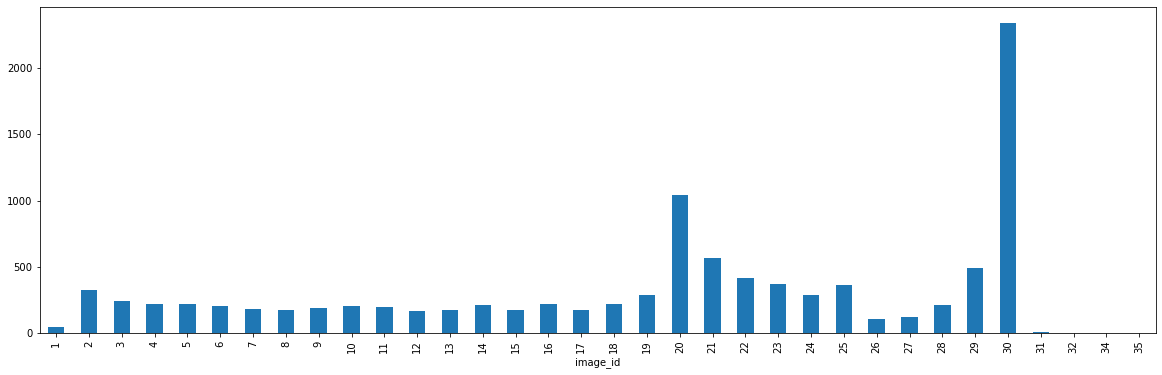

In [6]:
#Histogram
plt.figure(figsize=(20,6))
pd.DataFrame(identity.image_id.value_counts(ascending=True)).groupby('image_id').size().plot.bar()
plt.show()

<h2><b>Correlation (phi coefficient)<h2>

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [24]:
attbs = pd.read_csv(r'C:\Users\ngnpe\OneDrive\Desktop\Agile_ML_zip\Anno\list_attr_celeba.txt', delim_whitespace=True)

In [4]:
def corr_atrbs(atrbs):
    dictt = {}
    atrbs_copy = atrbs.copy()

    for col in atrbs_copy.columns:
        temp = atrbs_copy.drop(col, axis = 1)

        for col2 in temp.columns:
            coef = matthews_corrcoef(atrbs_copy[col], temp[col2])
            dictt[col+'_&_'+col2] = coef
    
        atrbs_copy.drop(col, axis = 1, inplace = True)

    corr_df = pd.DataFrame([list(dictt.keys()), list(dictt.values())]).transpose().rename(columns = {0:'combos', 1:'coef'}).sort_values(by = 'coef')

    return corr_df

In [12]:
corr_df = corr_atrbs(attbs)

In [13]:
#positive associations
corr_df.query('coef > 0.3')

,combos,coef
130,Bags_Under_Eyes_&_Male,0.301077
559,Heavy_Makeup_&_Rosy_Cheeks,0.302815
507,Goatee_&_Male,0.305602
257,Big_Nose_&_Chubby,0.314317
563,Heavy_Makeup_&_Wavy_Hair,0.323303
607,Male_&_Wearing_Necktie,0.329928
634,Mustache_&_Sideburns,0.336297
554,Heavy_Makeup_&_No_Beard,0.351256
564,Heavy_Makeup_&_Wearing_Earrings,0.353107
761,Wavy_Hair_&_Wearing_Lipstick,0.359305


In [14]:
#negative associations
corr_df[corr_df['coef'] < - 0.3]

,combos,coef
605,Male_&_Wearing_Lipstick,-0.789435
550,Heavy_Makeup_&_Male,-0.666724
511,Goatee_&_No_Beard,-0.570071
665,No_Beard_&_Sideburns,-0.543061
23,5_o_Clock_Shadow_&_No_Beard,-0.526946
593,Male_&_No_Beard,-0.522243
628,Mustache_&_No_Beard,-0.452595
57,Arched_Eyebrows_&_Male,-0.408016
94,Attractive_&_Male,-0.394451
603,Male_&_Wearing_Earrings,-0.373469


In [15]:
def corr_matrix(atr_df, plot = False):

    corr_mat = pd.DataFrame(columns = atr_df.columns, index = atr_df.columns)

    for row in corr_mat.index:
        for col in corr_mat.index:
            coeff = matthews_corrcoef(atr_df[row], atr_df[col])
            corr_mat.loc[row, col] = coeff

    if plot:
        plt.figure(figsize=(20,15))
        corr_mat = corr_mat.fillna(0.0)
        mask = np.triu(np.ones_like(corr_mat))
        cax = sns.heatmap(corr_mat, vmin = -1.0, vmax = 1.0, mask = mask, cmap ='plasma')
        cax.tick_params(labelsize=10)
        plt.show()
        
    else:
        return corr_mat

In [16]:
corr_matrix(attbs)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
5_o_Clock_Shadow,1.0,-0.158587,-0.062415,0.168488,0.005584,-0.089243,-0.043699,0.15201,0.100604,-0.132686,...,0.25937,-0.067777,0.05226,-0.12425,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,-0.158587,1.0,0.250599,-0.091947,-0.069524,-0.027775,0.2434,-0.084025,-0.000996,0.127009,...,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.09998,0.460409,0.220184,-0.132821,0.146798
Attractive,-0.062415,0.250599,1.0,-0.178464,-0.145826,0.059712,0.062552,-0.277064,0.00414,0.154774,...,-0.100229,0.147845,0.04155,0.214992,0.124349,-0.138636,0.480104,0.068738,-0.15642,0.387735
Bags_Under_Eyes,0.168488,-0.091947,-0.178464,1.0,0.116215,-0.057568,-0.005982,0.361604,0.002667,-0.106879,...,0.100411,0.112759,0.024208,-0.127128,-0.096969,-0.005726,-0.284052,-0.052964,0.19698,-0.230759
Bald,0.005584,-0.069524,-0.145826,0.116215,1.0,-0.064044,-0.003577,0.180148,-0.080364,-0.063056,...,0.058599,0.009402,-0.07192,-0.103482,-0.061211,-0.030625,-0.142852,-0.050445,0.176501,-0.196253
Bangs,-0.089243,-0.027775,0.059712,-0.057568,-0.064044,1.0,0.034876,-0.069395,-0.033558,0.098854,...,-0.073341,0.052469,0.020034,0.068166,0.058203,-0.079939,0.163378,0.114454,-0.092919,0.017695
Big_Lips,-0.043699,0.2434,0.062552,-0.005982,-0.003577,0.034876,1.0,0.076814,0.067191,0.023674,...,-0.039739,0.012885,-0.037144,0.12019,0.126523,-0.013286,0.195212,0.149892,-0.06777,0.107722
Big_Nose,0.15201,-0.084025,-0.277064,0.361604,0.180148,-0.069395,0.076814,1.0,0.081091,-0.158323,...,0.131667,0.100888,-0.028837,-0.131843,-0.058029,0.065552,-0.303651,-0.03593,0.205014,-0.284382
Black_Hair,0.100604,-0.000996,0.00414,0.002667,-0.080364,-0.033558,0.067191,0.081091,1.0,-0.233626,...,0.043231,-0.002533,0.112496,-0.085227,0.002348,-0.103605,-0.066856,-0.042539,0.023184,0.121372
Blond_Hair,-0.132686,0.127009,0.154774,-0.106879,-0.063056,0.098854,0.023674,-0.158323,-0.233626,1.0,...,-0.096039,0.090209,0.005458,0.1284,0.095005,-0.083373,0.281935,0.143577,-0.106377,0.052402


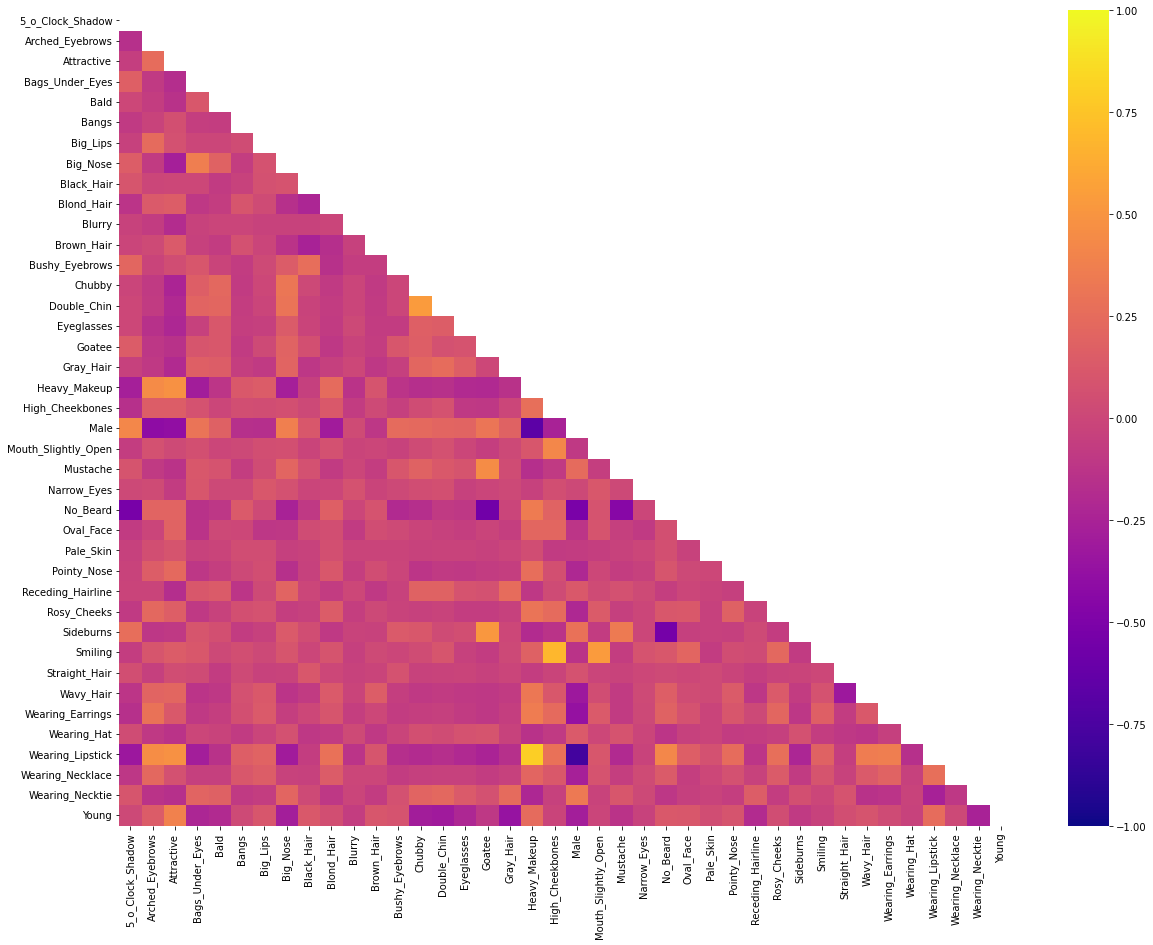

In [17]:
corr_matrix(attbs, True)

<h2><b>Relative distribution of attributes<h2>

In [18]:
#relative distributions of attributes
dist_var_df = pd.DataFrame(columns = ['var', 'dist_1_rel', 'dist_0_rel'])

for col in attbs.columns:

    dist_1_rel = pd.DataFrame(attbs[col].value_counts(normalize = True)).loc[1,col]
    dist_0_rel = pd.DataFrame(attbs[col].value_counts(normalize = True)).loc[-1,col]

    dist_var_df = pd.concat((dist_var_df, pd.DataFrame([col, dist_1_rel, dist_0_rel]).transpose().rename(columns = {0:'var', 1:'dist_1_rel', 2:'dist_0_rel'})))

dist_var_df

,var,dist_1_rel,dist_0_rel
0,5_o_Clock_Shadow,0.111136,0.888864
0,Arched_Eyebrows,0.266981,0.733019
0,Attractive,0.512505,0.487495
0,Bags_Under_Eyes,0.204572,0.795428
0,Bald,0.022443,0.977557
0,Bangs,0.151575,0.848425
0,Big_Lips,0.240796,0.759204
0,Big_Nose,0.234532,0.765468
0,Black_Hair,0.239251,0.760749
0,Blond_Hair,0.147992,0.852008


<h2><b>Balanced pairs generator<h2>

In [25]:
#joining annotations with attributes
df_joined = identity_filtered.merge(attbs.reset_index().rename(columns = {'index':'image'}), on = 'image')

In [26]:
def balanced_pairs(joined_df, n, atrbs):

    pairs_df = pd.DataFrame(columns = ['pic_1', 'pic_2', 'label'])

    joined_df_grouped = joined_df.groupby(atrbs)
    balanced_df = joined_df_grouped.apply(lambda x: x.sample(joined_df_grouped.size().min()).reset_index(drop=True))

    if n % 2 != 0:
        adj_list = random.sample([0, 1], k = 2)
        range_same = int(n/2) + adj_list[0]
        range_diff = int(n/2) + adj_list[1]
    else:
        range_same = n/2
        range_diff = n/2
 
    for i in range(int(range_same)):
        random_id_same = random.sample(list(balanced_df['image_id']), k = 1)
        while balanced_df.loc[balanced_df['image_id'] == random_id_same[0],'image'].shape[0] < 2:
            random_id_same = random.sample(list(balanced_df['image_id']), k = 1)
        random_same_pics = random.sample(list(balanced_df.loc[balanced_df['image_id'] == random_id_same[0],'image']), k = 2)

        hehehe = pd.DataFrame({'pic_1': [random_same_pics[0]], 'pic_2': [random_same_pics[1]], 'label':1})
        pairs_df = pd.concat((pairs_df, hehehe))

    for j in range(int(range_diff)):
        random_id_same1 = random.sample(list(balanced_df['image_id']), k = 1)
        random_id_same2 = random.sample(list(balanced_df.loc[balanced_df['image_id'] != random_id_same1[0],'image_id']), k = 1)

        random_same_pic1 = random.sample(list(balanced_df.loc[balanced_df['image_id'] == random_id_same1[0],'image']), k = 1)
        random_same_pic2 = random.sample(list(balanced_df.loc[balanced_df['image_id'] == random_id_same2[0],'image']), k = 1)

        hahaha = pd.DataFrame({'pic_1': random_same_pic1, 'pic_2': random_same_pic2, 'label': 0})
        pairs_df = pd.concat((pairs_df, hahaha))

    final_df = pairs_df.merge(joined_df[['image_id', 'image']+atrbs], left_on = 'pic_1', right_on = 'image').\
                                drop('image', axis=1).\
                            merge(joined_df[['image_id', 'image']+atrbs], left_on = 'pic_2', right_on = 'image', suffixes= ('_1', '_2')).\
                                drop('image', axis=1)

    return final_df.iloc[random.sample(list(final_df.index), final_df.shape[0]),:].reset_index(drop = True)

In [27]:
balanced_pairs(df_joined, 10, ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive'])

,pic_1,pic_2,label,image_id_1,5_o_Clock_Shadow_1,Arched_Eyebrows_1,Attractive_1,image_id_2,5_o_Clock_Shadow_2,Arched_Eyebrows_2,Attractive_2
0,016220.jpg,005591.jpg,1,2309,1,1,-1,2309,1,1,-1
1,094859.jpg,004052.jpg,1,7417,1,1,1,7417,1,-1,1
2,118518.jpg,020432.jpg,0,8586,1,-1,1,6662,1,1,-1
3,015572.jpg,084313.jpg,0,4080,1,-1,1,2240,1,-1,1
4,143109.jpg,054804.jpg,0,53,1,1,1,3325,1,-1,-1
5,067903.jpg,153945.jpg,0,4747,1,1,-1,8228,1,1,-1
6,042742.jpg,178302.jpg,0,1204,1,1,1,2393,1,1,-1
7,107087.jpg,046605.jpg,1,7354,1,-1,-1,7354,1,-1,-1
8,026437.jpg,034094.jpg,1,15,1,1,1,15,1,1,-1
9,031257.jpg,021278.jpg,1,826,1,1,-1,826,1,-1,-1


In [28]:
balanced_pairs(df_joined, 15, ['Wearing_Necklace', 'Straight_Hair', 'Blond_Hair'])

,pic_1,pic_2,label,image_id_1,Wearing_Necklace_1,Straight_Hair_1,Blond_Hair_1,image_id_2,Wearing_Necklace_2,Straight_Hair_2,Blond_Hair_2
0,045548.jpg,090852.jpg,1,5670,-1,1,1,5670,1,1,1
1,054582.jpg,070194.jpg,1,4549,1,1,-1,4549,-1,-1,1
2,022636.jpg,155393.jpg,1,1370,1,1,-1,1370,1,1,-1
3,182654.jpg,185997.jpg,1,5941,1,1,1,5941,1,-1,-1
4,186959.jpg,159136.jpg,0,6789,-1,1,1,3022,1,-1,1
5,119163.jpg,003575.jpg,0,5732,-1,-1,-1,9031,-1,-1,-1
6,054880.jpg,083039.jpg,1,963,-1,1,-1,963,1,1,-1
7,080251.jpg,037475.jpg,0,7320,-1,1,1,7232,-1,1,-1
8,184321.jpg,128078.jpg,0,8731,-1,1,-1,2448,-1,-1,1
9,096536.jpg,118303.jpg,0,5187,1,1,1,5146,1,-1,-1


In [29]:
df_joined.columns

Index(['image', 'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [30]:
x = balanced_pairs(df_joined, 200, ['Wearing_Necklace', 'Heavy_Makeup', 'Wearing_Lipstick'])
x

,pic_1,pic_2,label,image_id_1,Wearing_Necklace_1,Heavy_Makeup_1,Wearing_Lipstick_1,image_id_2,Wearing_Necklace_2,Heavy_Makeup_2,Wearing_Lipstick_2
0,055545.jpg,126214.jpg,0,648,-1,1,-1,6053,-1,1,-1
1,201202.jpg,099005.jpg,0,8495,-1,-1,1,5360,-1,1,1
2,089805.jpg,089422.jpg,1,2643,-1,1,1,2643,-1,-1,1
3,003102.jpg,014684.jpg,0,999,1,1,1,7619,1,-1,1
4,146893.jpg,164330.jpg,0,8045,1,-1,-1,3524,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
195,194382.jpg,198183.jpg,1,5253,-1,-1,1,5253,1,1,1
196,039625.jpg,152421.jpg,1,3575,-1,1,-1,3575,1,1,-1
197,043249.jpg,077308.jpg,0,8942,1,-1,1,1623,1,1,1
198,131323.jpg,022256.jpg,0,7009,-1,1,-1,256,1,-1,-1


<h1><b>TASK 5: CLASSIFICATION BASED ON BALANCED PAIRS<h1>

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Input, concatenate, Flatten, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow import float32
from tensorflow import stack
from tensorflow import convert_to_tensor
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [32]:
def bbox_engine(pic,image_path, m1_scale_factor = 1.1, m1_min_neighbors = 13):
    img = cv2.imread(image_path+pic)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image = img, scaleFactor = m1_scale_factor, minNeighbors = m1_min_neighbors)
    
    #New feature of the function - iteration over the neighbors parameter in case of empty bounding boxes.
    #Perhaps, we could also perform a hyperparameter tuning in order to choose an optimal number of neighbors which has the lowest validation error.
    while len(faces) < 1:
        m1_min_neighbors -= 1
        faces = face_cascade.detectMultiScale(image = img, scaleFactor = m1_scale_factor, minNeighbors = m1_min_neighbors)
        if m1_min_neighbors < 0:
            break
    
        #for face in faces:
            #(startX,startY) = face[0],face[1]
            #(endX,endY) = face[2],face[3]
    if len(faces) > 0:

        bbox = {
    #       "image_id" : image_id,
            "x_1" : faces[0][0],
            "y_1" : faces[0][1],
            "width" : faces[0][2],
            "height" : faces[0][3],
            'x_end' : faces[0][0] + faces[0][2],
            'y_end' : faces[0][1] + faces[0][3]}

        return bbox

bbox_col_names = {
    'x_start' : 'x_1',
    'y_start' : 'y_1',
    'width' : 'width',
    'height' : 'height',
    'x_end' : '',
    'y_end' : ''}

In [35]:
croplist1 = []
import numpy as np
bbox_generated = pd.DataFrame(columns= ['image_id', 'x_1', 'y_1', 'width', 'height', 'x_end', 'y_end'])
for i,pic in zip(x.index, x['pic_1']):
    bbox_coordinates = bbox_engine(pic, 'C:/Users/ngnpe/OneDrive/Desktop/Agile_ML_zip/img_celeba.7z/img_celeba_001/') #Dan, please, change

    #Generation of bounding boxes for the pic_1, if the bounding boxes are available.
    if bbox_coordinates != None:
        bbox_coordinates['image_id'] = pic
        bbox_generated = bbox_generated.append(bbox_coordinates, ignore_index = True)
        startX = bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['x_start']].values[0]
        startY = bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['y_start']].values[0]
        endX = startX + bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['width']].values[0]
        endY = startY + bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['height']].values[0]
        img =  cv2.imread('C:/Users/ngnpe/OneDrive/Desktop/Agile_ML_zip/img_celeba.7z/img_celeba_001/' + pic)
        crop_img = cv2.resize(img[startY:endY, startX:endX], (224, 224))
        crop_img = convert_to_tensor(crop_img, dtype=float32)
        croplist1.append(crop_img)
    #If the bounding boxes are not available, input 0 array.
    else:
        print(pic,'... no bounding boxes detected')
        zz = np.zeros(shape = (224, 224, 3))
        zz = convert_to_tensor(zz, dtype=float32)
        croplist1.append(zz)

In [36]:
croplist2 = []
bbox_generated = pd.DataFrame(columns= ['image_id', 'x_1', 'y_1', 'width', 'height', 'x_end', 'y_end'])
for i,pic in zip(x.index, x['pic_2']):
    bbox_coordinates = bbox_engine(pic, 'C:/Users/ngnpe/OneDrive/Desktop/Agile_ML_zip/img_celeba.7z/img_celeba_001/') #Dan, please, change

    #Generation of bounding boxes for the pic_1, if the bounding boxes are available.
    if bbox_coordinates != None:
        bbox_coordinates['image_id'] = pic
        bbox_generated = bbox_generated.append(bbox_coordinates, ignore_index = True)
        startX = bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['x_start']].values[0]
        startY = bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['y_start']].values[0]
        endX = startX + bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['width']].values[0]
        endY = startY + bbox_generated[bbox_generated['image_id'] == pic][bbox_col_names['height']].values[0]
        img =  cv2.imread('C:/Users/ngnpe/OneDrive/Desktop/Agile_ML_zip/img_celeba.7z/img_celeba_001/' + pic)
        crop_img = cv2.resize(img[startY:endY, startX:endX], (224, 224))
        crop_img = convert_to_tensor(crop_img, dtype=float32)
        croplist2.append(crop_img)

    #If the bounding boxes are not available, input 0 array.
    else:
        print(pic,'... no bounding boxes detected')
        zz = np.zeros(shape = (224, 224, 3))
        zz = convert_to_tensor(zz, dtype=float32)
        croplist2.append(zz)

In [37]:
print(len(croplist1))
print(len(croplist2))

200
200


In [38]:
#Filtering only those pairs, which have bounding boxes for both pictures.
inds_to_keep = []
for i in range(len(croplist1)):
    if (np.sum(croplist1[i].numpy()) == 0) or (np.sum(croplist2[i].numpy()) == 0):
        inds_to_keep.append(False)
    else:
        inds_to_keep.append(True)

In [39]:
from itertools import compress

#tf.stack -> convert numpy arrays into tensorflow objects.
croplist1 = stack(np.asarray(list(compress(croplist1, inds_to_keep))))
croplist2 = stack(np.asarray(list(compress(croplist2, inds_to_keep))))
labels = x.loc[inds_to_keep,'label'].values
labels = stack(labels)

In [40]:
print(croplist1.shape)
print(croplist2.shape)
print(labels.shape)

(200, 224, 224, 3)
(200, 224, 224, 3)
(200,)


<h2>Own built network (not ResNet)<h2>

In [51]:
import tensorflow as tf

In [ ]:
#The input layers for both pictures
input_layer1 = Input(shape=(224, 224, 3), name = 'CroppedImages_1')
input_layer2 = Input(shape=(224, 224, 3), name = 'CroppedImages_2')

#Pooling for both input layers
x1 = AveragePooling2D(pool_size=150, name = 'AvgPooling2D_1')(input_layer1)
x2 = AveragePooling2D(pool_size=150, name = 'AvgPooling2D_2')(input_layer2)

#Flatteting both layers
avgpool2d1 = Flatten(name = 'Flatten_1')(x1)
avgpool2d2 = Flatten(name = 'Flatten_2')(x2)

#1st hidden layers
dense_layer1 = Dense(3000, activation="relu", name = 'Dense_1_1')(avgpool2d1)
dense_layer2 = Dense(3000, activation="relu", name = 'Dense_2_1')(avgpool2d2)

#2nd hidden layers
dense_layer11 = Dense(4000, activation="relu", name = 'Dense_1_2')(dense_layer1)
dense_layer22 = Dense(4000, activation="relu", name = 'Dense_2_2')(dense_layer2)

#3rd hidden layers
dense_layer111 = Dense(5000, activation="relu", name = 'Dense_1_3')(dense_layer11)
dense_layer222 = Dense(5000, activation="relu", name = 'Dense_2_3')(dense_layer22)

#4th hidden layers
dense_layer1111 = Dense(10000, activation="relu", name = 'Dense_1_4')(dense_layer111)
dense_layer2222 = Dense(10000, activation="relu", name = 'Dense_2_4')(dense_layer222)

#Multiclass output layers for both pictures
y1_output = Dense(units=croplist1.shape[0], activation = 'softmax', name = 'Output_1')(dense_layer1111)
y2_output = Dense(units=croplist2.shape[0], activation = 'softmax', name = 'Output_2')(dense_layer2222)

#Model initialization for both branches
model1 = Model(inputs=input_layer1, outputs=y1_output)
model2 = Model(inputs=input_layer2, outputs=y2_output)

#Merging the outputs into final branch
combined = concatenate([model1.output, model2.output], name = 'Combined')

#1st hidden layer
comb_dense = Dense(3000, activation="relu", name = 'CombinedDense_1')(combined)

#2nd hidden layer
comb_dense1 = Dense(4000, activation="relu", name = 'CombinedDense_2')(comb_dense)

#3rd hidden layer
comb_dense2 = Dense(5000, activation="relu", name = 'CombinedDense_3')(comb_dense1)

#4th hidden layer
comb_dense3 = Dense(10000, activation="relu", name = 'CombinedDense_4')(comb_dense2)

#Final output
comb_output = Dense(1, name='FinalOutput', activation = 'softmax')(comb_dense3)

#Final model
comb_model = Model(inputs = [model1.input, model2.input], outputs = comb_output)

#Compilation of a new model
comb_model.compile(optimizer ='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

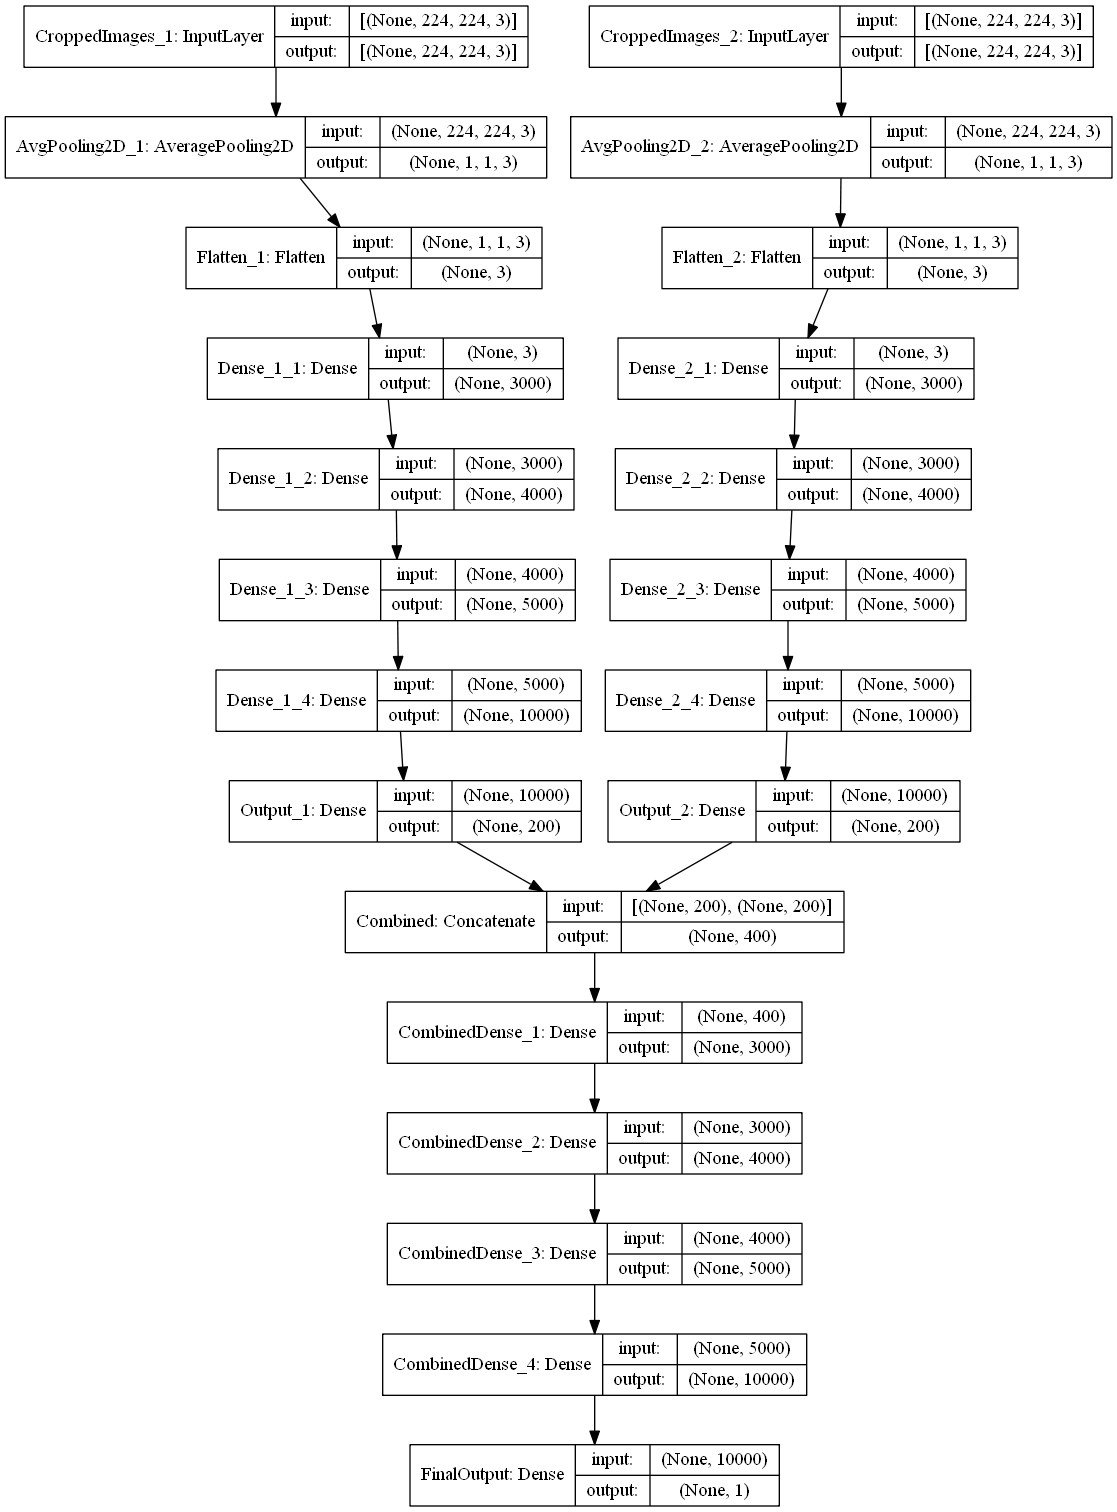

In [ ]:
plot_model(comb_model, show_shapes=True)

<h2>ResNet50 (not sure whether it's working - when fitting a model, it always crashes)<h2>

In [45]:
#1st branch
base_model1 = ResNet50(weights='imagenet', input_shape = (224, 224, 3), include_top=False)
layer1 = base_model1.output
layer1 = GlobalAveragePooling2D()(layer1)
predictions1 = Dense(x.loc[inds_to_keep,'image_id_1'].nunique(), activation='softmax')(layer1)
model1 = Model(inputs=base_model1.input, outputs=predictions1)

In [46]:
#2nd branch
base_model2 = ResNet50(weights='imagenet', input_shape = (224, 224, 3), include_top=False)
layer2 = base_model2.output
layer2 = GlobalAveragePooling2D()(layer2)
predictions2 = Dense(x.loc[inds_to_keep,'image_id_2'].nunique(), activation='softmax')(layer2)
model2 = Model(inputs=base_model2.input, outputs=predictions2)

In [47]:
#Renaming and distinguishing the models' layers.
for layer in model1.layers :
    layer._name = layer.name + str('_1')
for layer in model2.layers :
    layer._name = layer.name + str('_2')

In [48]:
#Merging and final model
combo = concatenate([model1.output, model2.output])
predictions3 = Dense(1, activation='sigmoid')(combo)
fin_model = Model(inputs = [model1.input, model2.input], outputs = predictions3)

In [49]:
fin_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3_1 (InputLayer)          [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_4_2 (InputLayer)          [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad_1 (ZeroPadding2D)     (None, 230, 230, 3)  0           input_3_1[0][0]                  
__________________________________________________________________________________________________
conv1_pad_2 (ZeroPadding2D)     (None, 230, 230, 3)  0           input_4_2[0][0]                  
____________________________________________________________________________________________

In [52]:
fin_model.compile(optimizer ='sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [53]:
modelicek = fin_model.fit([croplist1, croplist2], labels,  epochs=5, validation_split=0.2, shuffle = True) 

Epoch 1/5
3/5 [=================>............] - ETA: 2:35 - loss: 0.6929 - accuracy: 0.5312